# Consumer Behavior Analysis for Electric Vehicle Adoption

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.cluster import KMeans

# Splitting data and model evaluation
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

## Dataset Loading

In [3]:
data = pd.read_csv('H:\Harsha\Study\Data Mining\Project\Electric_Vehicle_Population_Data.csv')

In [4]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [5]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


## Data Preprocessing

In [6]:
# Checking the data shape
shape_of_data = data.shape
print(shape_of_data)

(177866, 17)


In [7]:
# Null values checking
data.isna()
data.isna().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [8]:
# Duplicat values check
Checking_duplicate_values=data.duplicated().sum()
print(f'The data set contains the {Checking_duplicate_values} values')

The data set contains the 0 values


In [9]:
# define a procudure to impute missing values for numeric data
def impute_numeric_data(data, columns, mode):
    for col in columns:
        if mode == 'median':
            value = data[col].median()
        elif mode == 'mean':
            value = data[col].mean()
        data[col].fillna(value, inplace=True)

# define a procudure to impute missing values for category data
def impute_categoric_data(data, columns):
    for col in columns:
        mode_value = data[col].mode().iloc[0]
        data[col].fillna(mode_value, inplace=True)
        
# apply imputation procedure for numeric and category data        
impute_numeric_data(data, ['Legislative District'], 'median')
impute_categoric_data(data, ['Model', 'Vehicle Location'])

# show missing values of data
data.isnull().sum()

VIN (1-10)                                           0
County                                               5
City                                                 5
State                                                0
Postal Code                                          5
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     5
2020 Census Tract                                    5
dtype: int64

## EDA

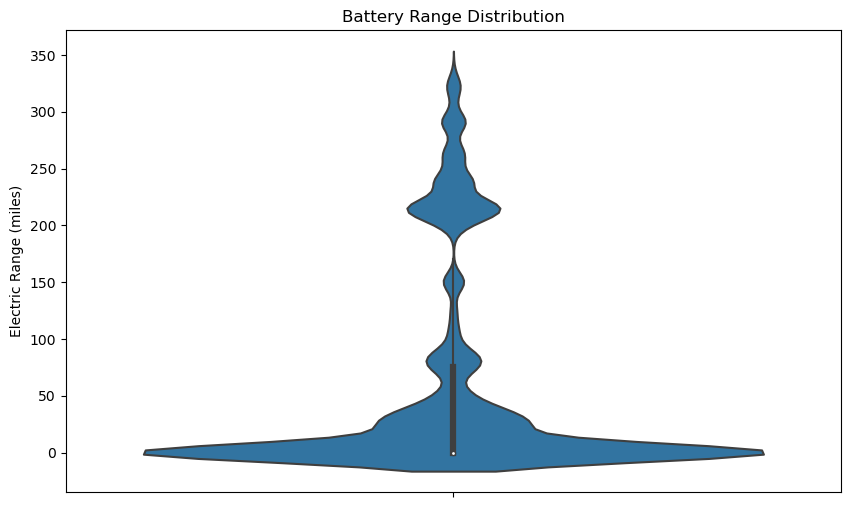

In [10]:
# Visualizing Battery Range using Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, y='Electric Range')
plt.title('Battery Range Distribution')
plt.ylabel('Electric Range (miles)')
plt.show()

In [11]:
# Selecting only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

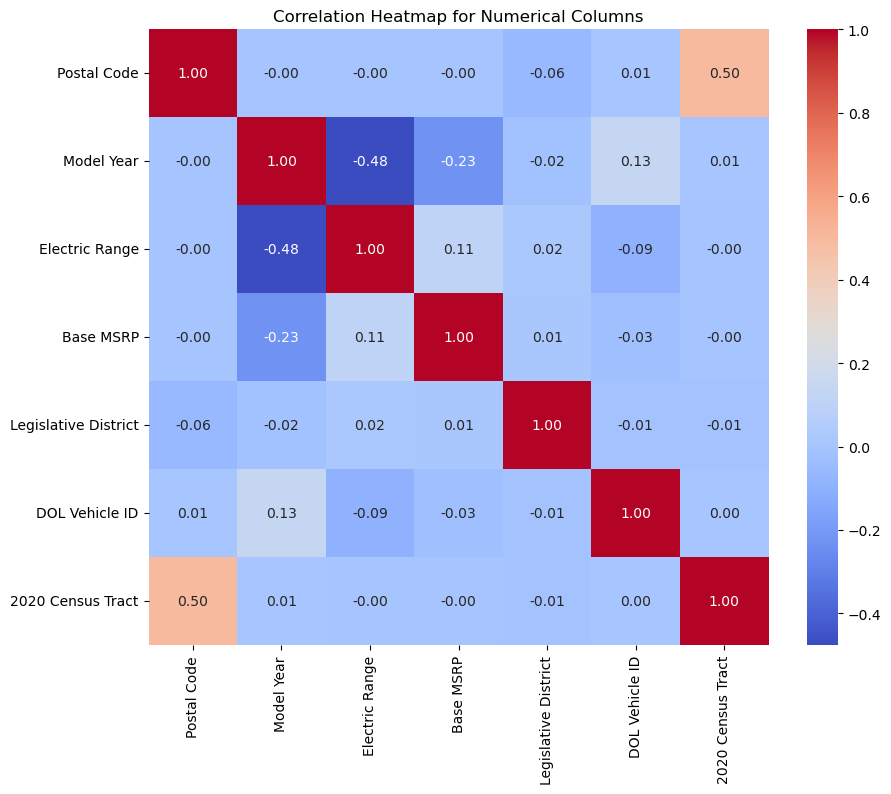

In [12]:
# Heatmap for Correlation with all numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

In [13]:
column_names = data.columns
print("Column names of EV DataFrame:", column_names)

Column names of EV DataFrame: Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


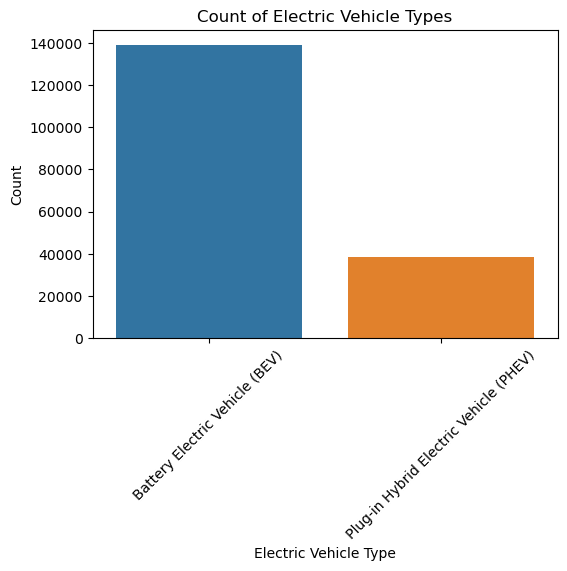

In [14]:
# Count of each Electric Vehicle Type
plt.figure(figsize=(6, 4))
sns.countplot(x='Electric Vehicle Type', data=data)
plt.title('Count of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

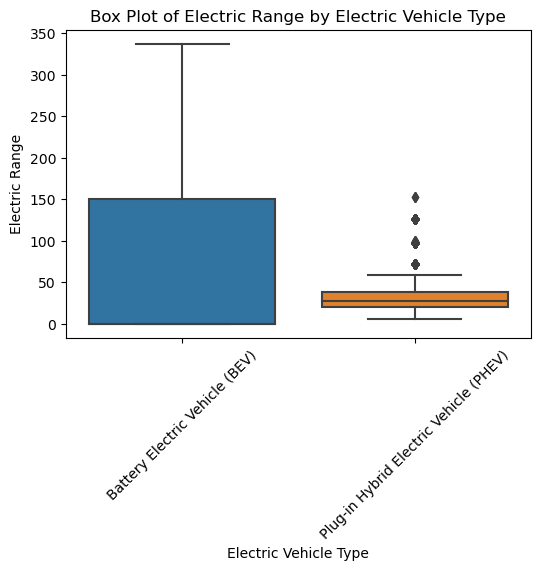

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=data)
plt.title('Box Plot of Electric Range by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range')
plt.xticks(rotation=45)
plt.show()

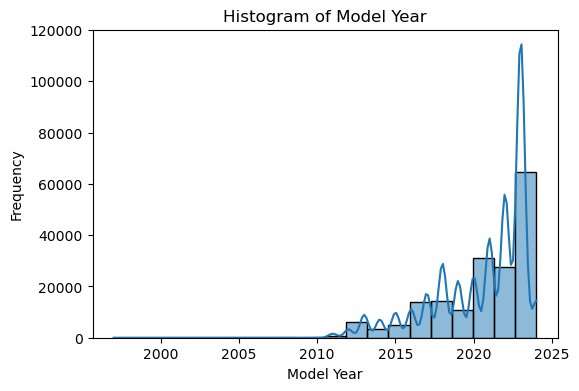

In [16]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Model Year'], bins=20, kde=True)
plt.title('Histogram of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

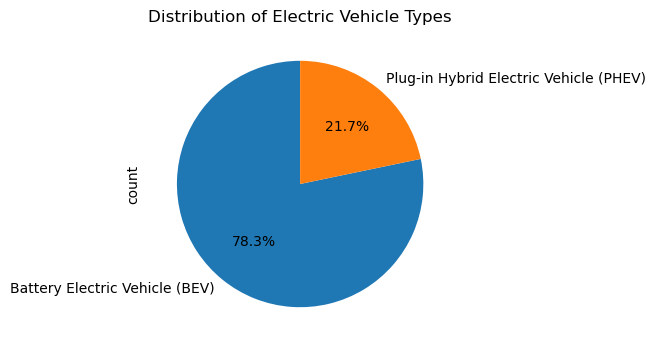

In [17]:
plt.figure(figsize=(4, 4))
data['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Electric Vehicle Types')
plt.show()

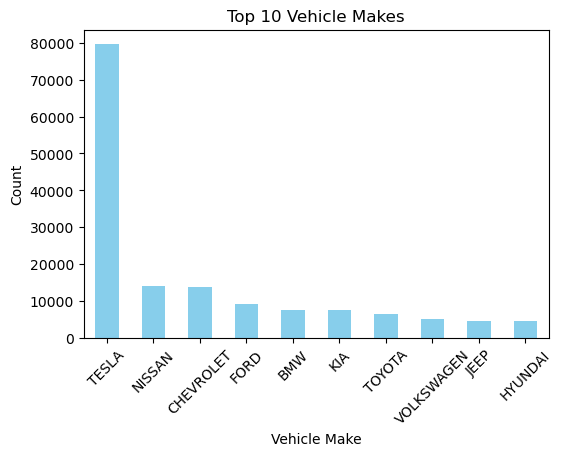

In [18]:
plt.figure(figsize=(6, 4))
top_makes = data['Make'].value_counts().nlargest(10)
top_makes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Vehicle Makes')
plt.xlabel('Vehicle Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Cleaning Null Values
data.dropna(inplace=True)

# Checking Duplicate Value
data.duplicated().sum()

# Removing Column
data['State'].value_counts()

# State column has only one value i.e WA means Washington D.C. So we can remove 'state' column
data.drop(columns='State',inplace=True)

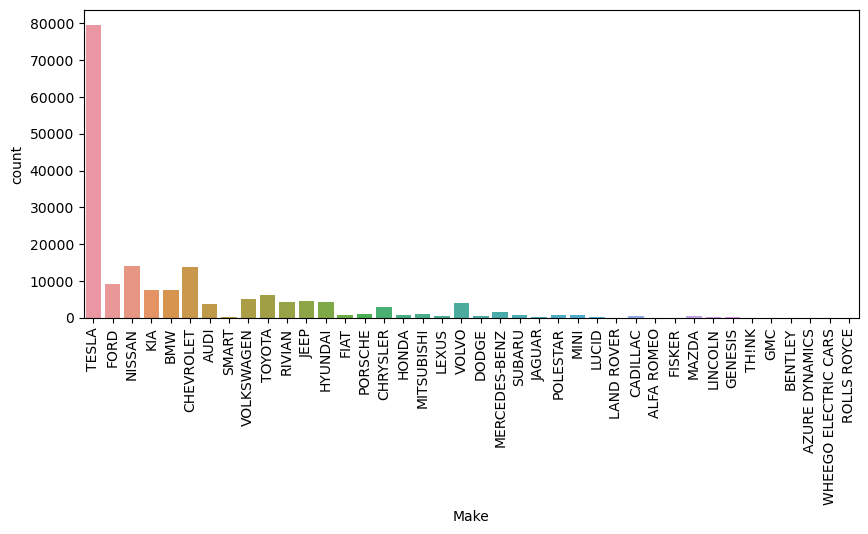

In [20]:
plt.figure(figsize=(10,4))
sns.countplot(x='Make',data=data)
plt.xticks(rotation=90);

<Axes: ylabel='count'>

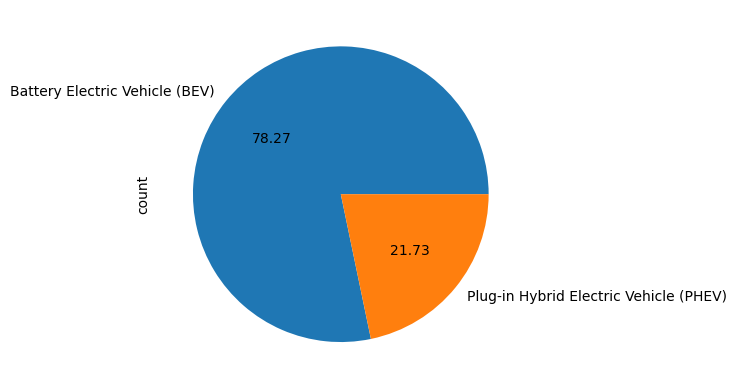

In [21]:
data['Electric Vehicle Type'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

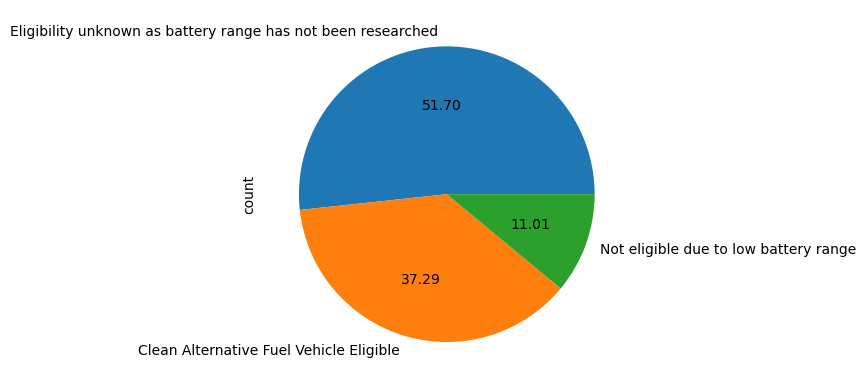

In [22]:
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Electric Vehicle Type', ylabel='Electric Range'>

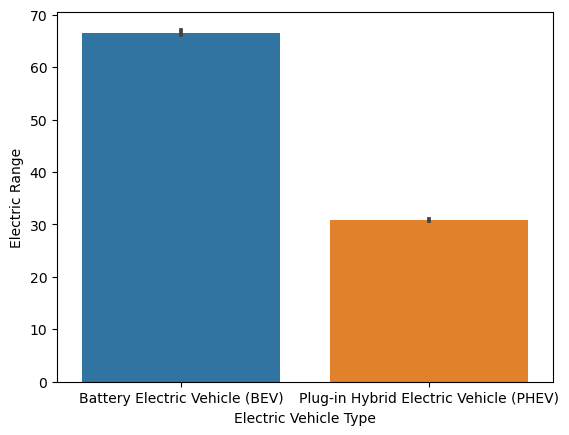

In [23]:
sns.barplot(x='Electric Vehicle Type',y='Electric Range',data=data)

(array([0, 1, 2]),
 [Text(0, 0, 'Clean Alternative Fuel Vehicle Eligible'),
  Text(1, 0, 'Eligibility unknown as battery range has not been researched'),
  Text(2, 0, 'Not eligible due to low battery range')])

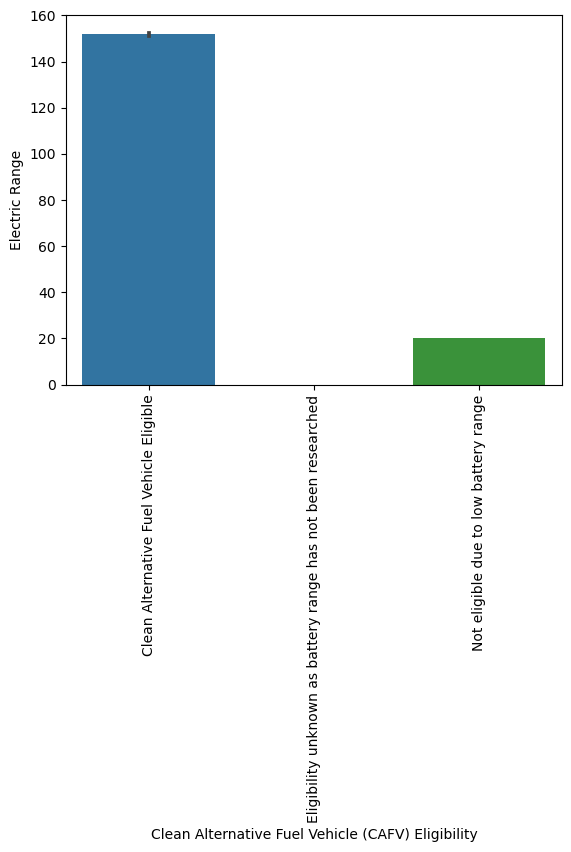

In [24]:
sns.barplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',y='Electric Range',data=data)
plt.xticks(rotation=90)

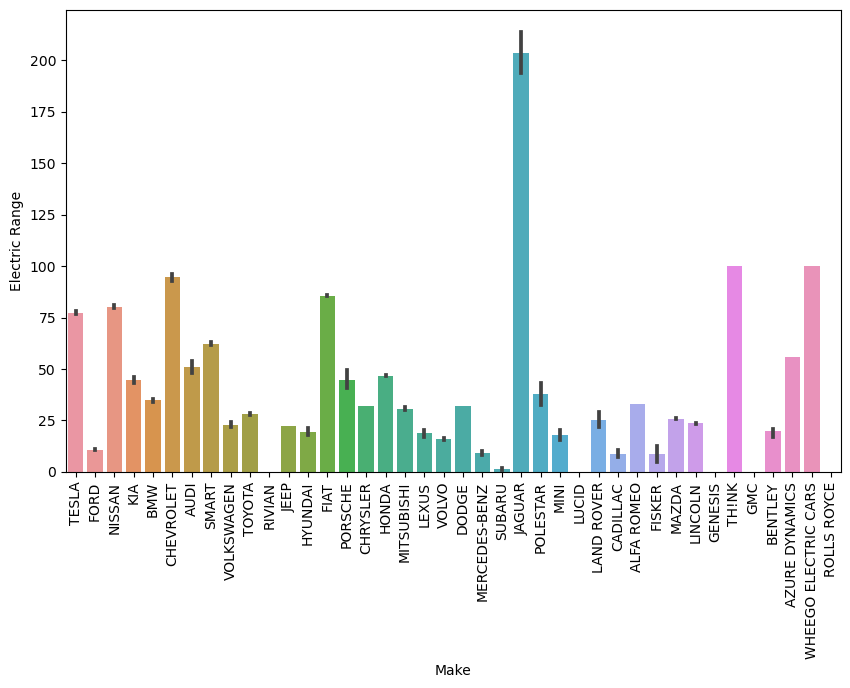

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='Make',y='Electric Range',data=data)
plt.xticks(rotation=90);

<Axes: xlabel='Model Year', ylabel='Electric Range'>

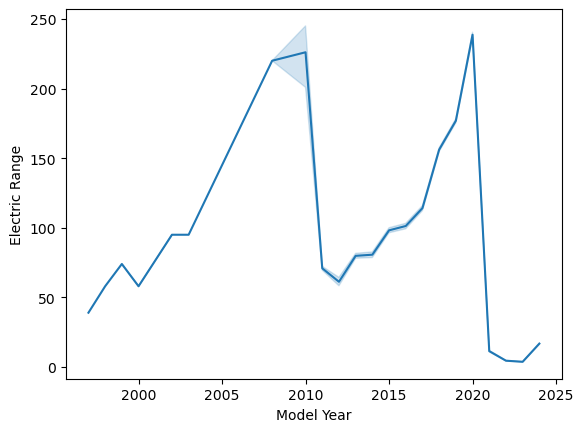

In [26]:
sns.lineplot(x='Model Year',y='Electric Range',data=data)

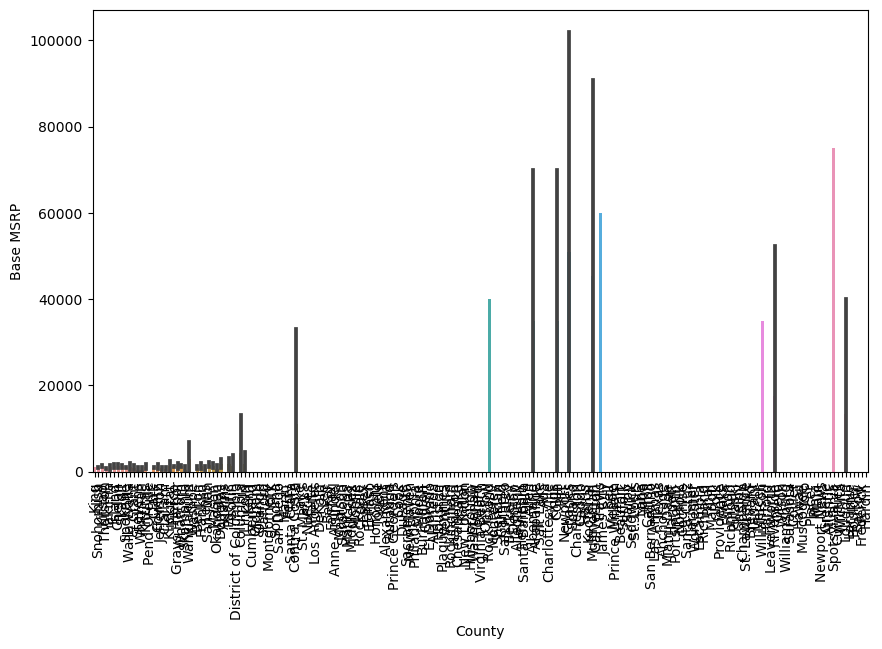

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='County',y='Base MSRP',data=data)
plt.xticks(rotation=90);

<Axes: xlabel='Electric Vehicle Type', ylabel='Base MSRP'>

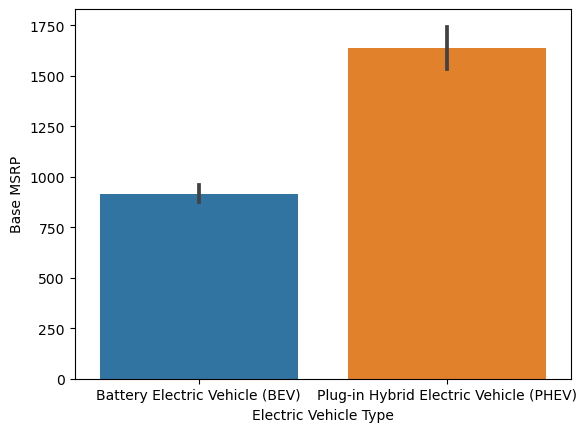

In [28]:
sns.barplot(x='Electric Vehicle Type',y='Base MSRP',data=data)

(array([0, 1, 2]),
 [Text(0, 0, 'Clean Alternative Fuel Vehicle Eligible'),
  Text(1, 0, 'Eligibility unknown as battery range has not been researched'),
  Text(2, 0, 'Not eligible due to low battery range')])

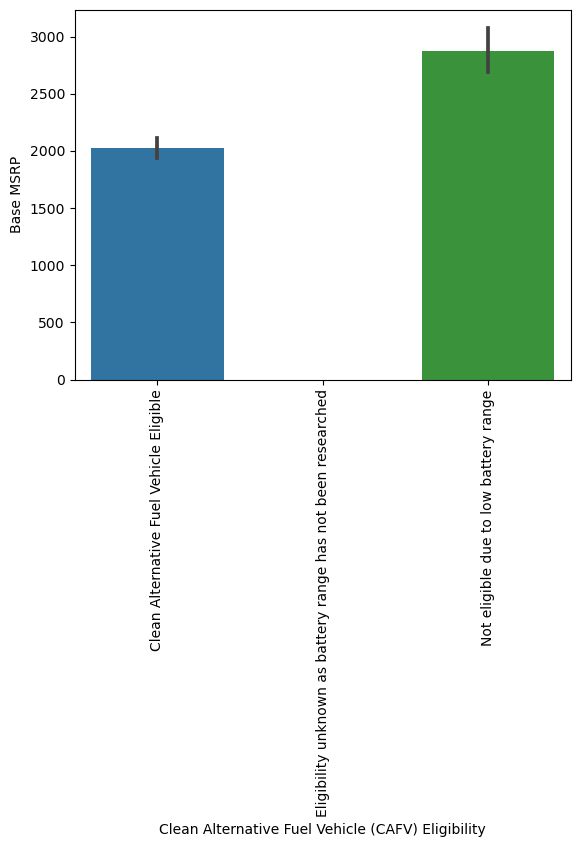

In [29]:
sns.barplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',y='Base MSRP',data=data)
plt.xticks(rotation=90)

In [30]:
# Defining the response variable
response_variable = 'Electric Range'
print(f'The response variable is: {response_variable}')

The response variable is: Electric Range


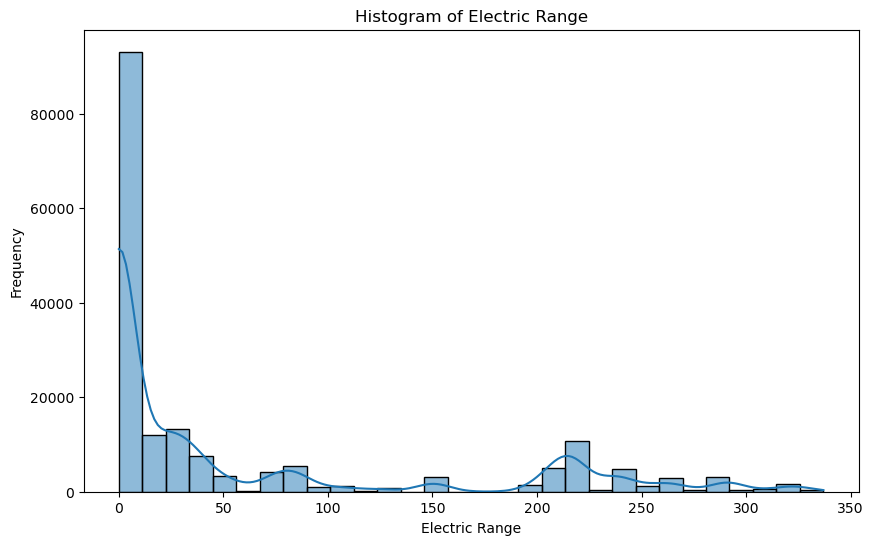

In [31]:
# Plotting histogram to determine the thresholds for Electric Range categories
plt.figure(figsize=(10, 6))
sns.histplot(data['Electric Range'], bins=30, kde=True)
plt.title('Histogram of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Research-based thresholds for Electric Range categories
low_threshold = 50
medium_threshold = 150

# Categorizing Electric Range into Low, Medium, High
bins = [0, low_threshold, medium_threshold, np.inf]
labels = ['Low', 'Medium', 'High']
data['Electric_Range_Category'] = pd.cut(data['Electric Range'], bins=bins, labels=labels)

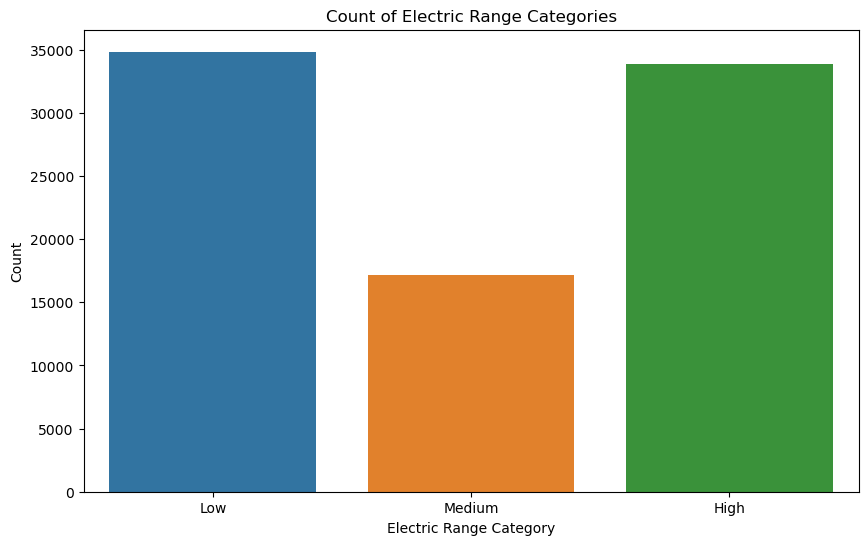

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Electric_Range_Category', data=data)
plt.title('Count of Electric Range Categories')
plt.xlabel('Electric Range Category')
plt.ylabel('Count')
plt.show()

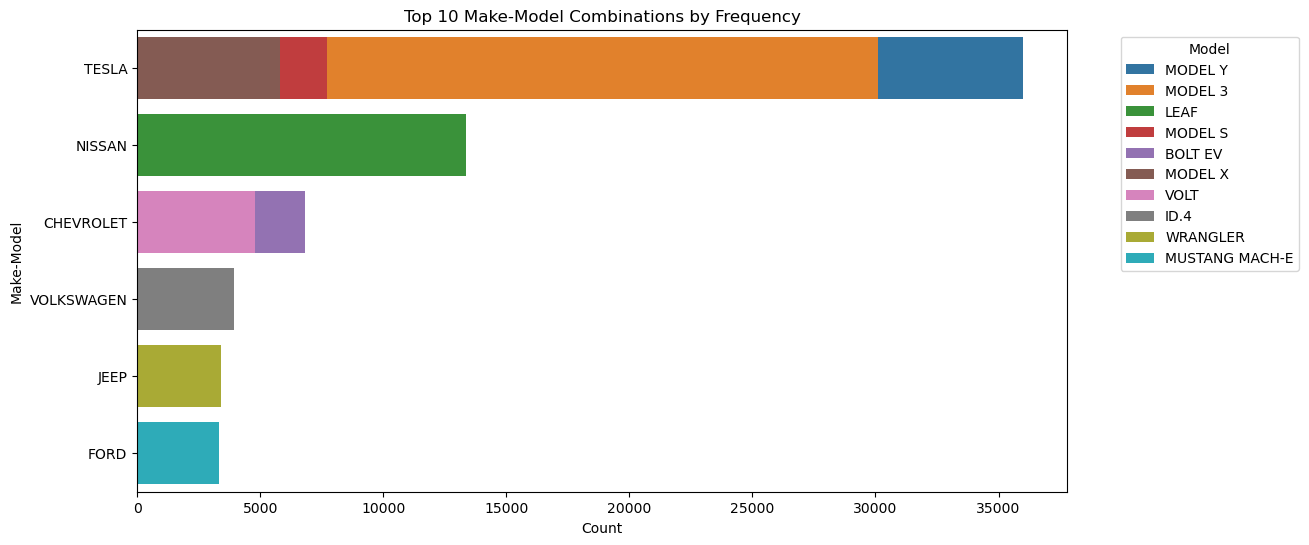

In [34]:
# Analyzing Make and Model per frequency
top_makes_models = data.groupby(['Make', 'Model']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Make', hue='Model', data=top_makes_models, dodge=False)
plt.title('Top 10 Make-Model Combinations by Frequency')
plt.xlabel('Count')
plt.ylabel('Make-Model')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [35]:
# Lets start by grouping our data according to Cities and Counties since our dataset online include eletric vehicles only
county_city_registrations = data.groupby(['County', 'City']).size().reset_index(name='Registrations')
county_city_registrations.head(2)

,County,City,Registrations
0,Ada,Boise,2
1,Adams,Aurora,1


In [36]:
# Then we need to arrange the grouped data in Descending order
highest_registrations = county_city_registrations.sort_values(by='Registrations', ascending=False)
highest_registrations.head(2)

,County,City,Registrations
277,King,Seattle,29447
244,King,Bellevue,8930


In [37]:
# To identify the most popular electric vehicle makes and models in Washington State based on the provided dataset columns, you 
# can follow these steps: Group the data by "Make" and "Model" columns to aggregate registrations for each combination.

make_model_distribution = data.groupby(['Make', 'Model']).size().reset_index(name='Registrations')
make_model_distribution.head(2)

,Make,Model,Registrations
0,ALFA ROMEO,TONALE,39
1,AUDI,A3,548


In [38]:
# Sort the DataFrame in descending order based on the number of registrations to identify the most popular electric vehicle makes and models.
popular_make_model = make_model_distribution.sort_values(by='Registrations', ascending=False)
popular_make_model.head(2)

,Make,Model,Registrations
120,TESLA,MODEL Y,35989
117,TESLA,MODEL 3,30091


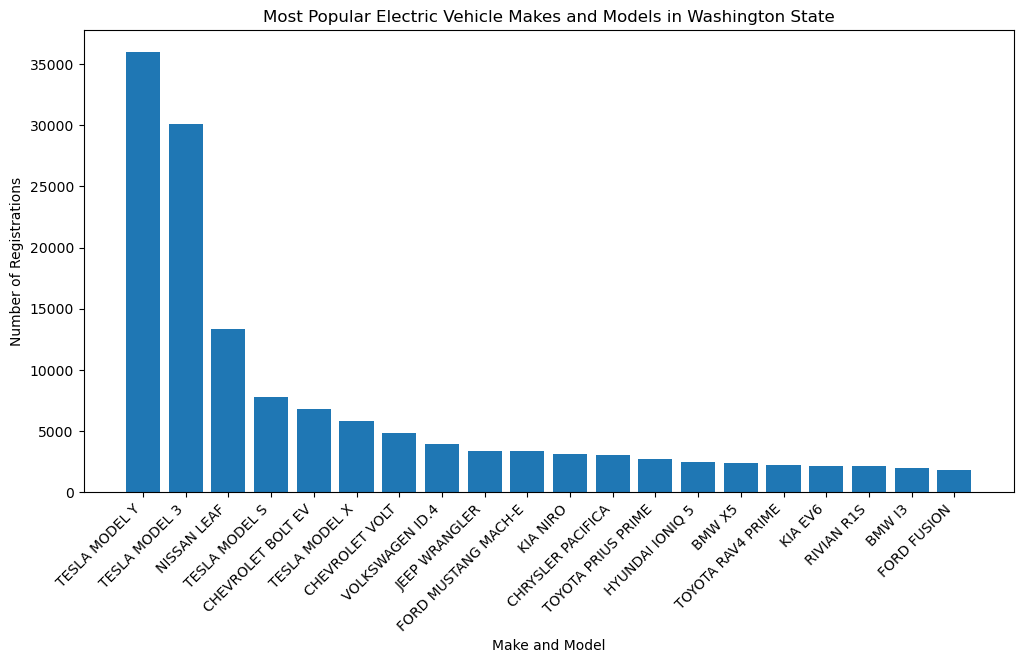

In [39]:
# Create visualizations, such as bar charts or tables, to illustrate the distribution of electric vehicle registrations across different makes and models.

x=popular_make_model.head(20)
plt.figure(figsize=(12, 6))
plt.bar(x['Make'] + ' ' + x['Model'], x['Registrations'])
plt.xlabel('Make and Model')
plt.ylabel('Number of Registrations')
plt.title('Most Popular Electric Vehicle Makes and Models in Washington State')
plt.xticks(rotation=45, ha='right')
plt.show()

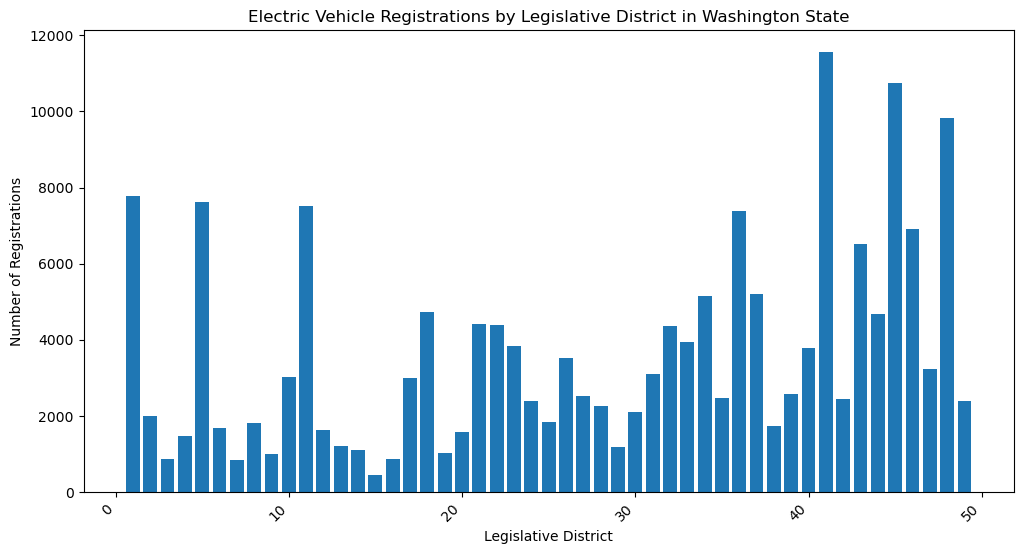

Correlation Coefficient: -0.054350212496645345


In [40]:
# Group by Legislative District
district_distribution = data.groupby('Legislative District').size().reset_index(name='Registrations')

# Sort by Registrations
popular_districts = district_distribution.sort_values(by='Registrations', ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(popular_districts['Legislative District'], popular_districts['Registrations'])
plt.xlabel('Legislative District')
plt.ylabel('Number of Registrations')
plt.title('Electric Vehicle Registrations by Legislative District in Washington State')
plt.xticks(rotation=45, ha='right')
plt.show()

# Calculate and display the correlation coefficient
correlation_coefficient = data['Legislative District'].corr( popular_districts['Registrations'])
print(f"Correlation Coefficient: {correlation_coefficient}")

In [41]:
from sklearn.preprocessing import LabelEncoder

# Now you can use LabelEncoder
label_encoder = LabelEncoder()
data['Electric Vehicle Type'] = label_encoder.fit_transform(data['Electric Vehicle Type'])
data['Make'] = label_encoder.fit_transform(data['Make'])

In [42]:
# Encoding categorical variables
label_encoder = LabelEncoder()
data['Electric Vehicle Type'] = label_encoder.fit_transform(data['Electric Vehicle Type'])
data['Make'] = label_encoder.fit_transform(data['Make'])
data['Model'] = label_encoder.fit_transform(data['Model'])

In [43]:
# Drop irrelevant columns
data.drop("VIN (1-10)", axis=1, inplace=True)

In [44]:
data[['Postal Code', 'Model Year', 'Make', 'Model', 'Electric Range', 'Base MSRP']]

,Postal Code,Model Year,Make,Model,Electric Range,Base MSRP
0,98122.0,2020,34,81,291,0
1,98021.0,2023,34,81,0,0
2,98109.0,2019,34,79,270,0
3,98027.0,2016,34,79,210,0
4,98392.0,2021,34,81,0,0
...,...,...,...,...,...,...
177861,98391.0,2022,34,81,0,0
177862,98584.0,2023,15,75,0,0
177863,98848.0,2021,34,81,0,0
177864,98010.0,2021,37,68,0,0


In [45]:
print(data.columns[:0])

Index([], dtype='object')


## Train Test data splitting

In [46]:
#sns.set_theme(style="white")
 
X = data[['Postal Code', 'Model Year', 'Make', 'Model', 'Electric Range', 'Base MSRP']].values
y = data['Electric Vehicle Type'].values


# split the data into train and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

In [47]:
# count the occurrences of target value in the 'Electric Vehicle Type' column
data['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
0    139205
1     38656
Name: count, dtype: int64

In [48]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Print Mean Squared Error and R2 Score
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 0.10961777154636794
R2 Score: 0.35557944222063453


In [49]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Evaluate Decision Tree Regressor
print("Decision Tree Regressor:")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_dt)}')
print(f'R2 Score: {r2_score(y_test, y_pred_dt)}')

Decision Tree Regressor:
Mean Squared Error: 9.37049045147023e-05
R2 Score: 0.9994491279472099


In [50]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate Random Forest Regressor
print("\nRandom Forest Regressor:")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}')
print(f'R2 Score: {r2_score(y_test, y_pred_rf)}')


Random Forest Regressor:
Mean Squared Error: 5.033785823905578e-05
R2 Score: 0.9997040739815614


In [51]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

# Evaluate Gradient Boosting Regressor
print("\nGradient Boosting Regressor:")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_gb)}')
print(f'R2 Score: {r2_score(y_test, y_pred_gb)}')


Gradient Boosting Regressor:
Mean Squared Error: 0.0007398532597295617
R2 Score: 0.995650553340175


In [52]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    results = {
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2,
        'MAPE': mape
    }
    return results

In [53]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_lr = reg.predict(X_test)
lr_results = evaluate_model(reg, X_test, y_test, y_pred_lr)

In [54]:
# Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
dt_results = evaluate_model(dt_reg, X_test, y_test, y_pred_dt)

In [55]:
# Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
rf_results = evaluate_model(rf_reg, X_test, y_test, y_pred_rf)

In [56]:
# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
gb_results = evaluate_model(gb_reg, X_test, y_test, y_pred_gb)
print("Gradient Boosting Regressor Results:", gb_results)

Gradient Boosting Regressor Results: {'MSE': 0.0007398532597295416, 'RMSE': 0.027200243743936224, 'R2 Score': 0.9956505533401752, 'MAPE': 15803922064227.9}


In [57]:
# Evaluation Summary
models_results = {
    'Linear Regression': lr_results,
    'Decision Tree Regressor': dt_results,
    'Random Forest Regressor': rf_results,
    'Gradient Boosting Regressor': gb_results
}

for model, results in models_results.items():
    print(f"\n{model} Evaluation:")
    for metric, value in results.items():
        print(f"{metric}: {value}")


Linear Regression Evaluation:
MSE: 0.10961777154636794
RMSE: 0.33108574651646955
R2 Score: 0.35557944222063453
MAPE: 561780997800843.9

Decision Tree Regressor Evaluation:
MSE: 9.37049045147023e-05
RMSE: 0.009680129364564416
R2 Score: 0.9994491279472099
MAPE: 84401874611.04031

Random Forest Regressor Evaluation:
MSE: 4.449826541810087e-05
RMSE: 0.006670702018386136
R2 Score: 0.9997384037586569
MAPE: 97906174548.80675

Gradient Boosting Regressor Evaluation:
MSE: 0.0007398532597295416
RMSE: 0.027200243743936224
R2 Score: 0.9956505533401752
MAPE: 15803922064227.9


## Naive Bayes

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# initialize the Naive Bayes classifier and fit it to the resampled training data
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

# make predictions on the test data
y_pred = NB_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.8963998575685451
ROC AUC Score: 0.819275183987384
Classification Report:

               precision    recall  f1-score   support

           0       0.92      0.96      0.94     41762
           1       0.81      0.68      0.74     11597

    accuracy                           0.90     53359
   macro avg       0.86      0.82      0.84     53359
weighted avg       0.89      0.90      0.89     53359

Confusion Matrix:

 [[39912  1850]
 [ 3678  7919]]


## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
# initialize the Logistic Regression classifier and fit it to the resampled training data
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train)

# make predictions on the test data
y_pred = LR_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.8342735058752975
ROC AUC Score: 0.6880596785827632
Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.95      0.90     41762
           1       0.69      0.43      0.53     11597

    accuracy                           0.83     53359
   macro avg       0.77      0.69      0.71     53359
weighted avg       0.82      0.83      0.82     53359

Confusion Matrix:

 [[39536  2226]
 [ 6617  4980]]


## Random Forest Classifier

In [60]:
# initialize the Random Forest classifier and fit it to the resampled training data
RF_classifier = RandomForestClassifier(n_estimators=100)
RF_classifier.fit(X_train, y_train)

# make predictions on the test data
y_pred = RF_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.9999062950954853
ROC AUC Score: 0.9998155689989119
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41762
           1       1.00      1.00      1.00     11597

    accuracy                           1.00     53359
   macro avg       1.00      1.00      1.00     53359
weighted avg       1.00      1.00      1.00     53359

Confusion Matrix:

 [[41761     1]
 [    4 11593]]


# Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_classifier.predict(X_test)

# Calculate metric evaluation and confusion matrix
accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)
classification_report_gb = classification_report(y_test, y_pred_gb)
confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Print the results
print("="*55)
print("Gradient Boosting Classifier")
print("Accuracy     :", accuracy_gb)
print("ROC AUC Score:", roc_auc_gb)
print("="*55)
print("Classification Report:\n\n", classification_report_gb)
print("="*55)
print("Confusion Matrix:\n\n", confusion_matrix_gb)
print("="*55)

Gradient Boosting Classifier
Accuracy     : 0.9999625180381941
ROC AUC Score: 0.9999449127947211
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41762
           1       1.00      1.00      1.00     11597

    accuracy                           1.00     53359
   macro avg       1.00      1.00      1.00     53359
weighted avg       1.00      1.00      1.00     53359

Confusion Matrix:

 [[41761     1]
 [    1 11596]]


# Hyperparameter tuning

In [62]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data_path = 'H:\\Harsha\\Study\\Data Mining\\Project\\Electric_Vehicle_Population_Data.csv'
data = pd.read_csv(data_path)

# Data Cleaning
data.dropna(inplace=True)
data.drop(columns='State', inplace=True)  # Removing State column as it has only one value


# Encoding categorical variables
label_encoder = LabelEncoder()
data['Electric Vehicle Type'] = label_encoder.fit_transform(data['Electric Vehicle Type'])
data['Make'] = label_encoder.fit_transform(data['Make'])
data['Model'] = label_encoder.fit_transform(data['Model'])

# Splitting data into features and target
X = data[['Postal Code', 'Model Year', 'Make', 'Model', 'Electric Range', 'Base MSRP']]
y = data['Electric Vehicle Type']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

# Initialize the Random Forest classifier
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("="*55)
print("Accuracy     :", accuracy)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)
print("Confusion Matrix:\n\n", cm)
print("="*55)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Accuracy     : 0.9999248713421734
ROC AUC Score: 0.9999520199596968
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41684
           1       1.00      1.00      1.00     11558

    accuracy                           1.00     53242
   macro avg       1.00      1.00      1.00     53242
weighted avg       1.00      1.00      1.00     53242

Confusion Matrix:

 [[41680     4]
 [    0 11558]]


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor

# Splitting data and model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Load the data
data = pd.read_csv('H:\Harsha\Study\Data Mining\Project\Electric_Vehicle_Population_Data.csv')

# Data preprocessing
data.dropna(inplace=True)
data.drop(columns=['State', 'VIN (1-10)'], inplace=True)

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Electric Vehicle Type'] = label_encoder.fit_transform(data['Electric Vehicle Type'])
data['Make'] = label_encoder.fit_transform(data['Make'])
data['Model'] = label_encoder.fit_transform(data['Model'])

# Define features and target
X = data[['Postal Code', 'Model Year', 'Make', 'Model', 'Electric Range', 'Base MSRP']].values
y = data['Electric Vehicle Type'].values

# Split the data into train and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

# Function to evaluate models
def evaluate_model(model, X_test, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    results = {
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2,
        'MAPE': mape
    }
    return results

# Fine-tuning hyperparameters for Random Forest Classifier using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt']
}
rf = RandomForestClassifier(random_state=21)
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=50, scoring='accuracy', cv=5, n_jobs=-1, verbose=2, random_state=21)
random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
rf_results = evaluate_model(best_rf, X_test, y_test, y_pred_rf)

# Evaluation Summary
print("\nRandom Forest Classifier Evaluation:")
for metric, value in rf_results.items():
    print(f"{metric}: {value}")

# Print best hyperparameters
print("\nBest Hyperparameters for Random Forest Classifier:")
print(random_search_rf.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Random Forest Classifier Evaluation:
MSE: 0.0001126929867397919
RMSE: 0.010615695301759178
R2 Score: 0.9993369389239077
MAPE: 253762046544.29758

Best Hyperparameters for Random Forest Classifier:
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
